# Notebook R d'exemple utilisant l'API SAS Viya

## 1) On déclare la librairie SWAT permettant d'utiliser l'API R fournie par SAS Viya

In [1]:
library(swat)

SWAT 1.6.3


## 2) Connexion au moteur CAS (Cloud Analytic Services) in-memory de la plateforme de Service Analytique SAS Viya

In [3]:
#Sys.setenv(CAS_CLIENT_SSL_CA_LIST = "/opt/viyacerts/trustedcerts.pem")
Sys.setenv(CAS_CLIENT_SSL_CA_LIST = "/opt/sas/viya/config/etc/SASSecurityCertificateFramework/cacerts/trustedcerts.pem")

conn <- CAS('frasepviya35smp.cloud.com', 5570)

# Activate session parameters if necessary
loadActionSet(conn, "fedSql")
cas.sessionProp.setSessOpt(conn, timeout=1800, caslib='casuser')

NOTE: Connecting to CAS and generating CAS action functions for loaded
      action sets...
NOTE: To generate the functions with signatures (for tab completion), set 
      options(cas.gen.function.sig=TRUE).
NOTE: Added action set 'fedSql'.
NOTE: Information for action set 'fedSql':
NOTE:    fedSql
NOTE:       execDirect - Submits a SAS FedSQL language statement for immediate execution
NOTE: 'CASUSER(viyademo01)' is now the active caslib.


list()

## 3) On liste toutes les tables de SAS Viya visibles pour l'utlisateur (sécurité)  pour une librairie CAS particulière

In [4]:
cas.table.tableInfo(conn,caslib="samples")$TableInfo$Name

NOTE: No tables are available in caslib Samples of Cloud Analytic Services.


NULL

## 4) On référence une table CAS dans l'environnement R et on peut déléguer les calculs à SAS Viya comme indiqué avec les quelques exemples ci-dessous

In [4]:
# Table DTM_FACT_EJ : 30 Go, 61 millions de records
casTbl <- defCasTable(conn, tablename="RAND_RETAILDEMO", caslib="samples")

### 4.1 Certaines fonctions R de base sont automatiquement déléguée à SAS Viya pour l'exécution dans le moteur CAS via des actions natives (Logique de Wrapper)

In [5]:
head(casTbl)

CustID,bucket,age,loyalty_card,Department,brand_name,Storechain,ChannelType,Class,StoreNum,...,Region_Long,Region_2,Region_2_Lat,Region_2_Long,State,State_Lat,State_Long,age_bucket,Storechain1,brand_name1
1083863,1,NaN,0,health,Pine,GRAND,Resale,oral care,736,...,-74.50,US Atlantic Coast,40.3,-74.50,NY,41.5435,-74.6941,18-25,FAST,Oak
1083863,1,NaN,0,kids,Pine,GRAND,Resale,kids_swimwear,736,...,-74.50,US Atlantic Coast,40.3,-74.50,NY,41.5435,-74.6941,36-45,GRAND,Pine
1083863,1,NaN,0,men,Pine,GRAND,Resale,men_slippers,736,...,-84.75,US Midwest,43.3,-84.75,IL,41.2340,-88.3961,56-65,MODA,Maple
1083863,2,NaN,0,men,Pine,GRAND,Internet,men_underwear,724,...,-74.50,US Atlantic Coast,40.3,-74.50,NJ,40.4403,-74.4296,46-55,MODA,Maple
1083883,2,23,1,electronics,Pine,GRAND,Store,DVD & Blu-ray,757,...,-84.75,US Midwest,43.3,-84.75,KS,38.4575,-96.5830,26-35,GRAND,Pine
1083883,2,23,1,health,Pine,GRAND,Internet,bath & body,376,...,-75.00,US Northeast,42.0,-75.00,MA,42.2748,-71.3780,Over 65,GRAND,Pine


In [6]:
names(casTbl)

[1] "CustID"        "bucket"        "age"           "loyalty_card" 
 [5] "Department"    "brand_name"    "Storechain"    "ChannelType"  
 [9] "Class"         "StoreNum"      "Storeage"      "trx_hr_char"  
[13] "trx_dow_new"   "trx_tod"       "Date"          "MDY"          
[17] "Year"          "Sales"         "Cost"          "mkt_bdgt"     
[21] "Margin"        "sss"           "City"          "City_Lat"     
[25] "City_Long"     "Country"       "Country_Lat"   "Country_Long" 
[29] "Region"        "Region_Lat"    "Region_Long"   "Region_2"     
[33] "Region_2_Lat"  "Region_2_Long" "State"         "State_Lat"    
[37] "State_Long"    "age_bucket"    "Storechain1"   "brand_name1"

In [7]:
dim(casTbl)

[1] 930046     40

In [8]:
colMeans(casTbl)

CustID        bucket           age  loyalty_card      StoreNum 
 1.857178e+07  1.582845e+00  4.357741e+01  2.758993e-01  6.126681e+02 
     Storeage          Date           MDY          Year         Sales 
 8.423475e+00  1.820285e+04  3.232570e+04  2.009143e+03  4.197586e+01 
         Cost      mkt_bdgt        Margin           sss      City_Lat 
 1.364745e+01  6.575598e+05  2.837336e+01  8.633577e+04  3.691084e+01 
    City_Long   Country_Lat  Country_Long    Region_Lat   Region_Long 
-9.119452e+01  3.701263e+01 -9.145084e+01  3.930507e+01 -9.085200e+01 
 Region_2_Lat Region_2_Long     State_Lat    State_Long 
 3.930507e+01 -9.085200e+01  3.701263e+01 -9.145084e+01

In [9]:
mean(casTbl$Margin)

[1] 28.37336

In [10]:
nrow(casTbl)

[1] 930046

In [11]:
summary(casTbl)

     CustID             bucket           age             loyalty_card   
 Min.   :      19   Min.   :1.000   Min.   :    18.00   Min.   :0.0000  
 1st Qu.: 5607946   1st Qu.:1.000   1st Qu.:    28.00   1st Qu.:0.0000  
 Median :13905944   Median :2.000   Median :    39.00   Median :0.0000  
 Mean   :18571781   Mean   :1.583   Mean   :    43.58   Mean   :0.2759  
 3rd Qu.:31523532   3rd Qu.:2.000   3rd Qu.:    56.00   3rd Qu.:1.0000  
 Max.   :48188727   Max.   :3.000   Max.   :   140.00   Max.   :1.0000  
                                    NA's   :673447.00                   
       Department     brand_name     Storechain       ChannelType    
 electronics:152440   Maple: 82960   FAST :255628   Internet:778137  
 grocery    :157015   Oak  :255628   GRAND:609390   Resale  : 51586  
 health     :181439   Pine :591458   MODA : 65028   Store   :100323  
 kids       :123427                                                  
 men        :111311                                               

### 4.2) Les actions CAS plus avancées peuvent être invoquées directement en tant que nouvelles fonctions R disponibles (tout sera calculé à l'échelle dans le moteur CAS sans déplacer les données de l'environnement SAS Viya)

In [12]:
cas.simple.distinct(conn,  table = list(caslib="samples",name="RAND_RETAILDEMO"),  inputs = c("StoreNum","YEAR","CUSTID"))

Column,NDistinct,NMiss,Trunc
StoreNum,1076,0,0
Year,2,0,0
CustID,699816,0,0


In [13]:
cas.simple.freq(conn, table = list(caslib="samples",name="RAND_RETAILDEMO"), inputs = c("YEAR"))

Column,NumVar,FmtVar,Level,Frequency
Year,2009,2009,1,796622
Year,2010,2010,1,133424


In [14]:
cas.fedSql.execDirect(conn, query="select count(*) from samples.RAND_RETAILDEMO")

COUNT
930046


## 5) On peut aussi récupérer les données de SAS Viya sous forme de dataframe R (en faisant attention à la volumétrie traitable par le moteur R). 
Ensuite fonctions et librairies R habituelles des utilisateurs pourront être utilisées. Les données pourront être par la suite envoyées simplement vers le serveur SAS Viya pour un partage sécurisé de ces données aux autres utilisateurs par exemple.

In [16]:
dfR <- to.casDataFrame(casTbl, obs = 100000)

In [17]:
head(dfR)

CustID,bucket,age,loyalty_card,Department,brand_name,Storechain,ChannelType,Class,StoreNum,...,Region_Long,Region_2,Region_2_Lat,Region_2_Long,State,State_Lat,State_Long,age_bucket,Storechain1,brand_name1
1083863,1,NaN,0,health,Pine,GRAND,Resale,oral care,736,...,-74.50,US Atlantic Coast,40.3,-74.50,NY,41.5435,-74.6941,18-25,FAST,Oak
1083863,1,NaN,0,kids,Pine,GRAND,Resale,kids_swimwear,736,...,-74.50,US Atlantic Coast,40.3,-74.50,NY,41.5435,-74.6941,36-45,GRAND,Pine
1083863,1,NaN,0,men,Pine,GRAND,Resale,men_slippers,736,...,-84.75,US Midwest,43.3,-84.75,IL,41.2340,-88.3961,56-65,MODA,Maple
1083863,2,NaN,0,men,Pine,GRAND,Internet,men_underwear,724,...,-74.50,US Atlantic Coast,40.3,-74.50,NJ,40.4403,-74.4296,46-55,MODA,Maple
1083883,2,23,1,electronics,Pine,GRAND,Store,DVD & Blu-ray,757,...,-84.75,US Midwest,43.3,-84.75,KS,38.4575,-96.5830,26-35,GRAND,Pine
1083883,2,23,1,health,Pine,GRAND,Internet,bath & body,376,...,-75.00,US Northeast,42.0,-75.00,MA,42.2748,-71.3780,Over 65,GRAND,Pine


In [18]:
dim(dfR)

[1] 100000     40

In [19]:
summary(dfR)

     CustID             bucket           age          loyalty_card   
 Min.   : 1083863   Min.   :1.000   Min.   : 18.00   Min.   :0.0000  
 1st Qu.: 4829015   1st Qu.:1.000   1st Qu.: 28.00   1st Qu.:0.0000  
 Median : 5599582   Median :2.000   Median : 38.00   Median :0.0000  
 Mean   :14767304   Mean   :1.591   Mean   : 42.72   Mean   :0.2688  
 3rd Qu.:28578964   3rd Qu.:2.000   3rd Qu.: 53.00   3rd Qu.:1.0000  
 Max.   :34410005   Max.   :3.000   Max.   :140.00   Max.   :1.0000  
                                    NA's   :73124                    
  Department         brand_name         Storechain        ChannelType       
 Length:100000      Length:100000      Length:100000      Length:100000     
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                       

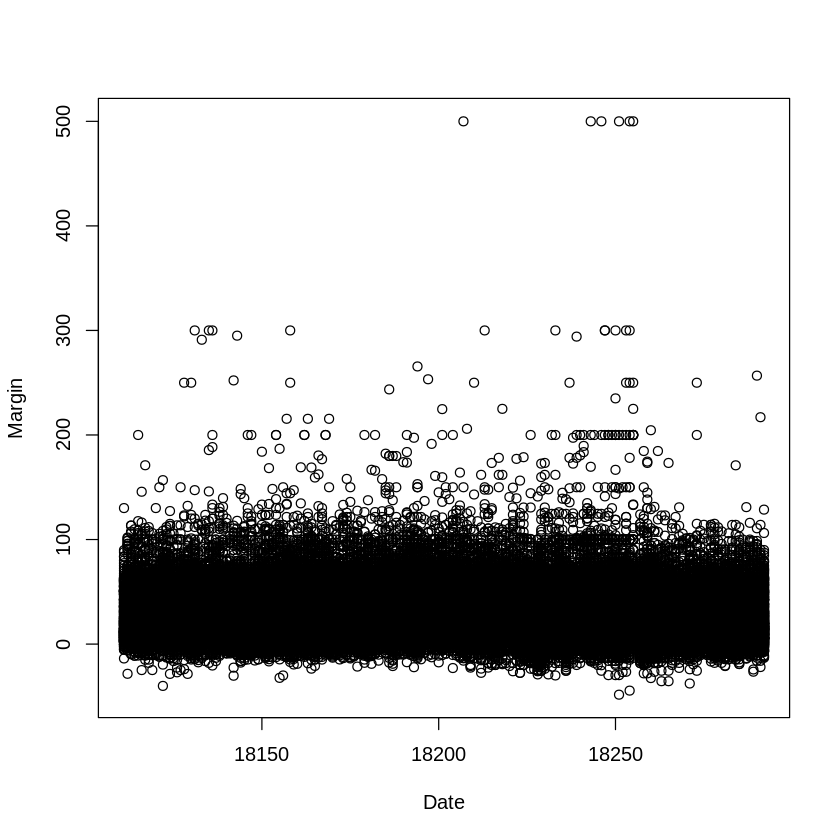

In [23]:
plot(dfR[c("Date","Margin")])

# On ferme le session en cours sur l'environnement SAS Viya (sinon un timeout sera appliqué pour fermer automatiquement la session  sur inactivité)

In [24]:
cas.session.endSession(conn)

list()